## Load tools

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [4]:
! pip install geopandas
! pip install rasterio
! pip install descartes

     |████████████████████████████████| 901kB 8.4MB/s 
     |████████████████████████████████| 11.2MB 28.0MB/s 
     |████████████████████████████████| 17.9MB 21.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
     |████████████████████████████████| 19.7MB 8.9MB/s 


In [5]:
! pip install pandasql

  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
from pandasql import sqldf as sql

In [0]:
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from shapely.geometry import MultiPolygon, Polygon
from shapely.ops import cascaded_union
from shapely.wkt import loads
from tqdm import tqdm

import rasterio
from rasterio.windows import Window
import geopandas as gpd

In [0]:
from PIL import Image
from PIL import ImageDraw

## Load data

In [0]:
# ! cp "/content/gdrive/My Drive/Colab Notebooks/satellite_images.zip" /content/satellite_images.zip
# ! cp "/content/gdrive/My Drive/Colab Notebooks/test.zip" /content/satellite_images.zip
! cp "/content/gdrive/My Drive/Colab Notebooks/ortigas_cbd.zip" /content/satellite_images.zip

In [0]:
! unzip /content/satellite_images.zip -d /satellite_images/

Archive:  /content/satellite_images.zip
  inflating: /satellite_images/ortigas_cbd/Untitled.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d571243_lon121d065809.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d5724_lon121d064622.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d5724_lon121d065809.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d573557_lon121d053931.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d573557_lon121d055119.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d573557_lon121d056307.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d573557_lon121d063434.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d573557_lon121d064622.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d573557_lon121d065809.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d574714_lon121d053931.png  
  inflating: /satellite_images/ortigas_cbd/zm128m_lat14d574714_lon121d055119

In [0]:
# ! ls /satellite_images/satellite_images
! ls /satellite_images/ortigas_cbd

Untitled.png			       zm128m_lat14d581655_lon121d061059.png
zm128m_lat14d571243_lon121d065809.png  zm128m_lat14d581655_lon121d062246.png
zm128m_lat14d5724_lon121d064622.png    zm128m_lat14d581655_lon121d063434.png
zm128m_lat14d5724_lon121d065809.png    zm128m_lat14d581655_lon121d064622.png
zm128m_lat14d573557_lon121d053931.png  zm128m_lat14d581655_lon121d06581.png
zm128m_lat14d573557_lon121d055119.png  zm128m_lat14d581655_lon121d066998.png
zm128m_lat14d573557_lon121d056307.png  zm128m_lat14d582812_lon121d055119.png
zm128m_lat14d573557_lon121d063434.png  zm128m_lat14d582812_lon121d056307.png
zm128m_lat14d573557_lon121d064622.png  zm128m_lat14d582812_lon121d057495.png
zm128m_lat14d573557_lon121d065809.png  zm128m_lat14d582812_lon121d058683.png
zm128m_lat14d574714_lon121d053931.png  zm128m_lat14d582812_lon121d059871.png
zm128m_lat14d574714_lon121d055119.png  zm128m_lat14d582812_lon121d061059.png
zm128m_lat14d574714_lon121d056307.png  zm128m_lat14d582812_lon121d062247.png
zm128m_lat14d5747

In [0]:
! mkdir '/content/satellite_images_cropped'

In [0]:
! ls /content/

gdrive	sample_data  satellite_images_cropped  satellite_images.zip


## View one image

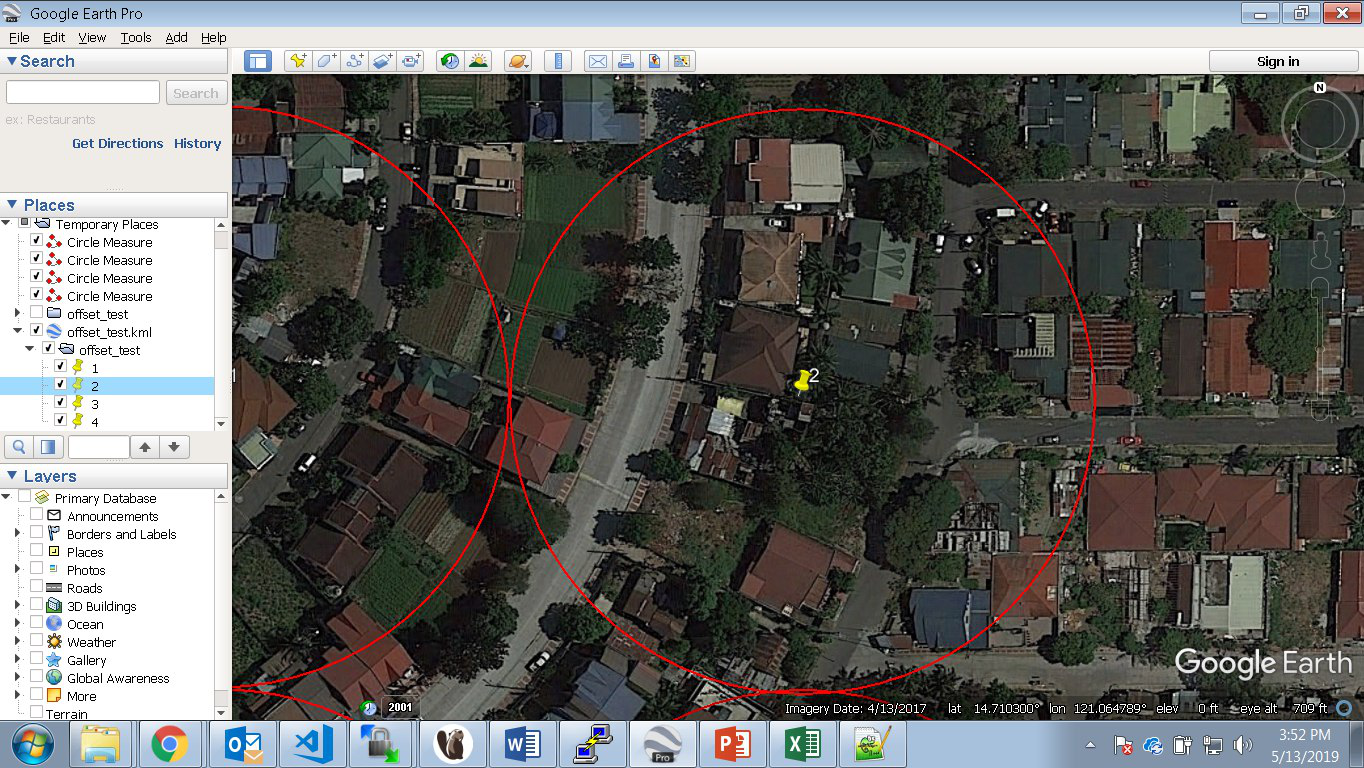

In [0]:
img = Image.open('/content/gdrive/My Drive/Colab Notebooks/test2.jpg')#.convert('L')
# im = im.crop((1, 1, 98, 33)) # left upper right lower
img

In [0]:
img.size

(1364, 768)

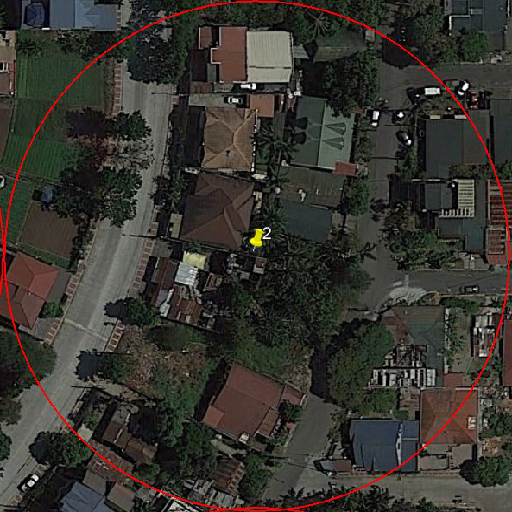

In [0]:
# get pixel coords http://nicodjimenez.github.io/boxLabel/annotate.html
img.crop((505, 108, 1098, 695)).resize((512,512))

In [0]:
len(img_ls)

362

In [0]:
!ls '/content/gdrive/My Drive/Colab Notebooks/satellite_images_cropped/'

zm128m_lat14d634247_lon121d067003_cropped.JPG
zm128m_lat14d634247_lon121d071756_cropped.JPG


In [0]:
# path = Path('/satellite_images/satellite_images').ls()[0]
path = Path('/satellite_images/test').ls()[0]
path

PosixPath('/satellite_images/test/zm128m_lat14d633156_lon121d022953.png')

In [0]:
temp = str(path).split('/')
filename = temp[-1].split('.')[0]
filename

'zm128m_lat14d633156_lon121d022953'

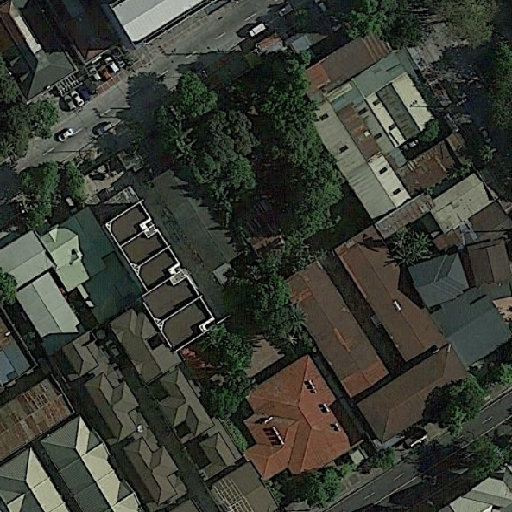

In [0]:
img = Image.open(path)
# img.crop((710,  151, 1544, 977)).resize((512,512))
img.crop((505, 108, 1098, 695)).resize((512,512)) # left upper right lower

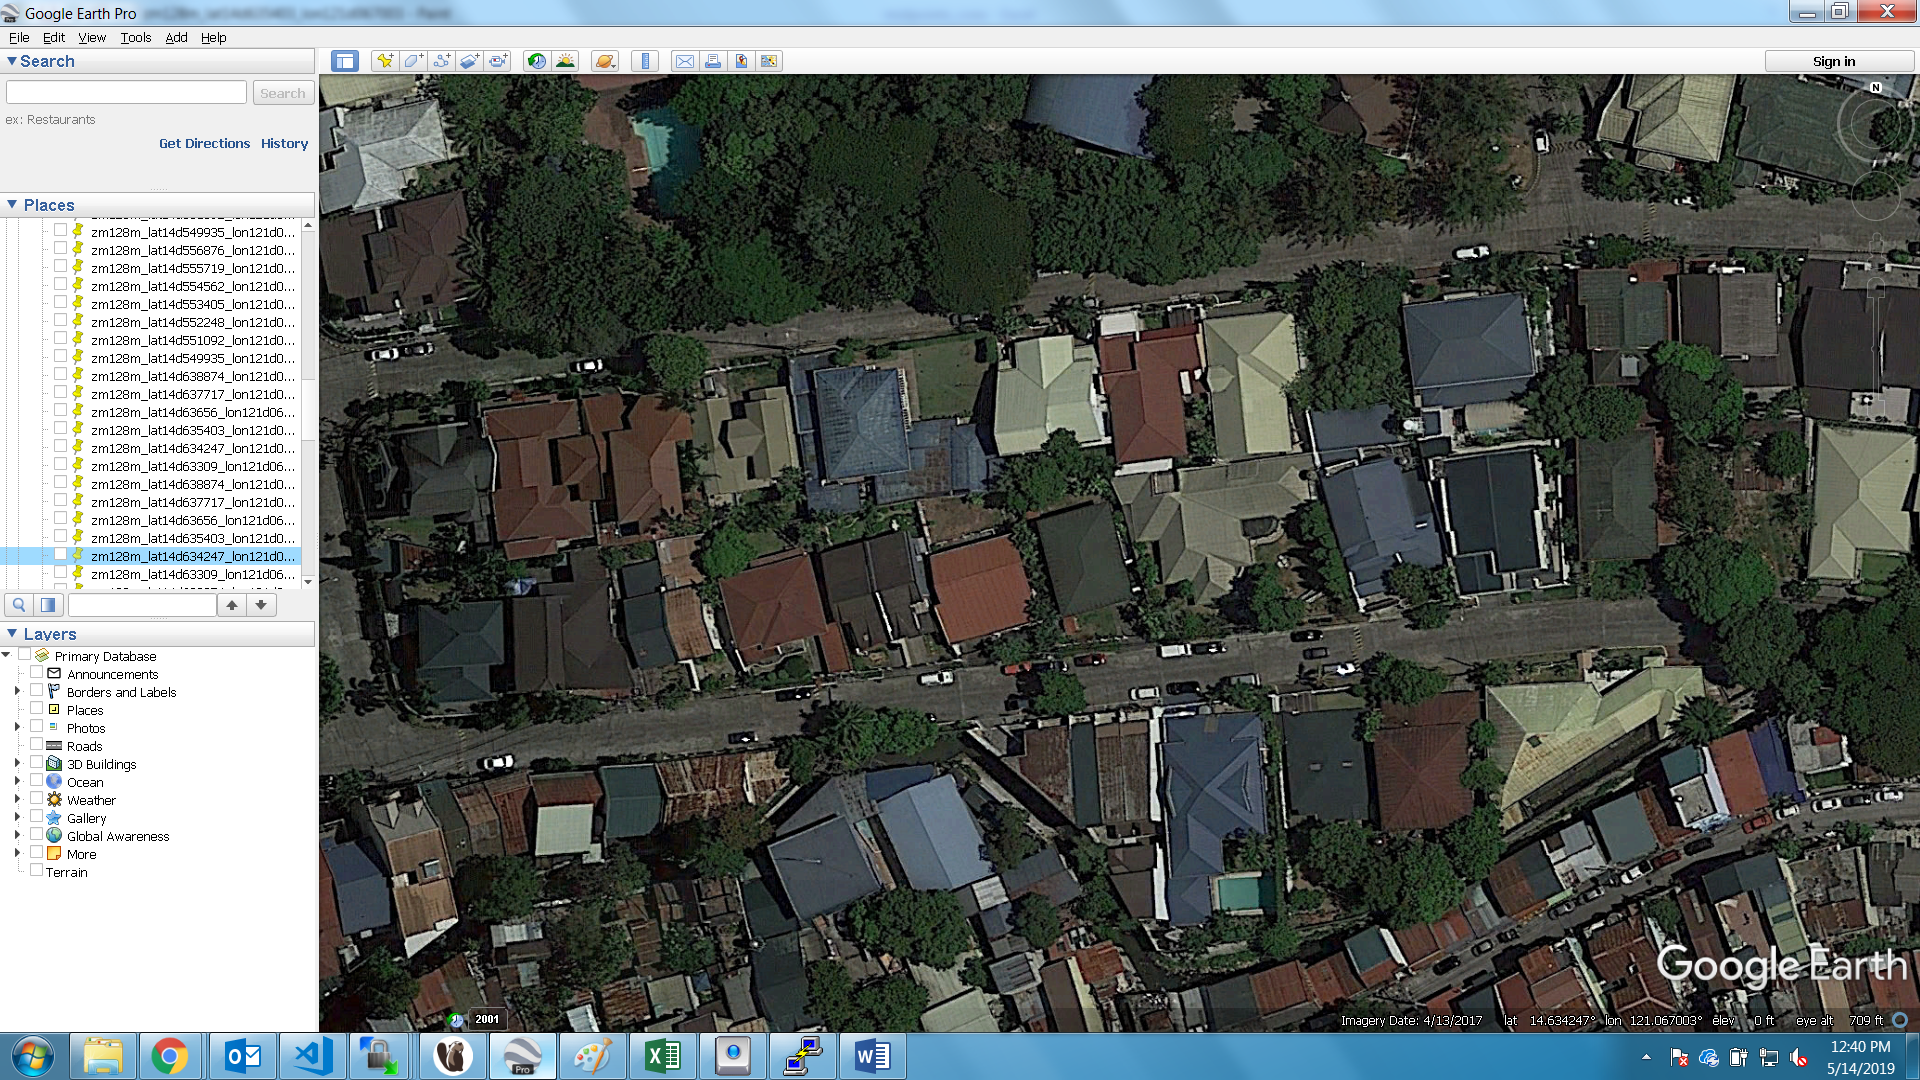

In [0]:
img

In [0]:
img.size

(1920, 1080)

In [0]:
(505, 108, 1098, 695) # left upper right lower
(1364, 768)
(1920, 1080)

In [0]:
1920/1364, 1080/768

(1.4076246334310851, 1.40625)

In [0]:
np.array((505, 108, 1098, 695)) * 1.4065

array([ 710.2825,  151.902 , 1544.337 ,  977.5175])

## Crop Google Earth screenshots to 512x512 images

In [0]:
# img_ls = Path('/satellite_images/satellite_images').ls()
img_ls = Path('/satellite_images/ortigas_cbd').ls()
for p in range(0, len(img_ls)):
  path = img_ls[p]
  img = Image.open(path)
#   img = img.crop((710,  151, 1544, 977)).resize((512,512))
  img = img.crop((505, 108, 1098, 695)).resize((512,512))
  temp = str(path).split('/')
  filename = temp[-1].split('.')[0]
  img.save('/content/gdrive/My Drive/Colab Notebooks/satellite_images_cropped/' + filename + '_cropped.JPG')
  print('Cropped ' + filename + '.png')

Cropped zm128m_lat14d579342_lon121d057495.png
Cropped zm128m_lat14d587439_lon121d064623.png
Cropped zm128m_lat14d574714_lon121d062246.png
Cropped zm128m_lat14d579341_lon121d068186.png
Cropped zm128m_lat14d575871_lon121d062246.png
Cropped zm128m_lat14d587439_lon121d062247.png
Cropped zm128m_lat14d577028_lon121d063434.png
Cropped zm128m_lat14d582812_lon121d056307.png
Cropped zm128m_lat14d577028_lon121d064622.png
Cropped zm128m_lat14d575871_lon121d064622.png
Cropped zm128m_lat14d583969_lon121d059871.png
Cropped zm128m_lat14d579342_lon121d052744.png
Cropped zm128m_lat14d574714_lon121d056307.png
Cropped zm128m_lat14d585126_lon121d057495.png
Cropped zm128m_lat14d583969_lon121d058683.png
Cropped zm128m_lat14d578185_lon121d058683.png
Cropped zm128m_lat14d58744_lon121d058683.png
Cropped zm128m_lat14d577028_lon121d057495.png
Cropped zm128m_lat14d59091_lon121d068187.png
Cropped zm128m_lat14d58744_lon121d057495.png
Cropped zm128m_lat14d582812_lon121d055119.png
Cropped zm128m_lat14d575871_lon121d05

## Manual annotate

Manually annotate bounding boxes in cropped images using http://nicodjimenez.github.io/boxLabel/annotate.html

## Train-Test Split

In [0]:
! cp "/content/gdrive/My Drive/Colab Notebooks/manual_mapped_20190715_2.csv" /content/annotations.csv

In [18]:
annos = pd.read_csv('/content/annotations.csv', names = ['filename', 'x1', 'y1', 'x2', 'y2', 'class_name'], header = None)
annos.shape

(1217, 6)

In [16]:
np.array(filenames)[trid]

array(['/content/satellite_images_cropped/zm128m_lat14d552248_lon121d020263_cropped.JPG',
       '/content/satellite_images_cropped/zm128m_lat14d554562_lon121d014324_cropped.JPG',
       '/content/satellite_images_cropped/zm128m_lat14d553405_lon121d014324_cropped.JPG',
       '/content/satellite_images_cropped/zm128m_lat14d552249_lon121d014324_cropped.JPG', ...,
       '/content/satellite_images_cropped/zm128m_lat14d637717_lon121d072944_cropped.JPG',
       '/content/satellite_images_cropped/zm128m_lat14d63656_lon121d072944_cropped.JPG',
       '/content/satellite_images_cropped/zm128m_lat14d634246_lon121d072944_cropped.JPG',
       '/content/satellite_images_cropped/zm128m_lat14d63309_lon121d072944_cropped.JPG'], dtype='<U79')

In [17]:
filenames = annos.filename.unique().tolist()
test_size = int(len(filenames)*0.2)
tsid = np.random.choice(range(0,len(filenames)), size=test_size, replace=False)
trid = np.array(list(set(range(0,len(filenames))) - set(tsid)))
files_train = np.array(filenames)[trid]
files_test = np.array(filenames)[tsid]
len(files_train), len(files_test)

(79, 19)

In [19]:
annos_train = annos[annos.filename.isin(files_train)]
annos_test = annos[annos.filename.isin(files_test)]
len(annos_train), len(annos_test)

(996, 221)

In [0]:
annos_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/annotations_train.csv', header = False, index = False)
annos_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/annotations_test.csv', header = False, index = False)